# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Campesan

Student name: Giulia
    
ID: 1161495 (Bachelor ID)

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math as m

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 125
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')


# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)



(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [58 71 62 55 73 66 53 53 55 54]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


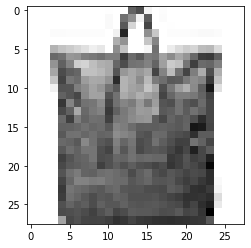

LABEL: 8
INPUT:


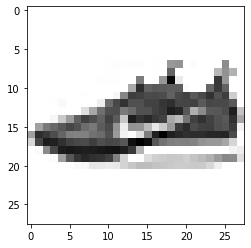

LABEL: 7
INPUT:


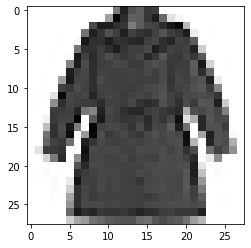

LABEL: 3
INPUT:


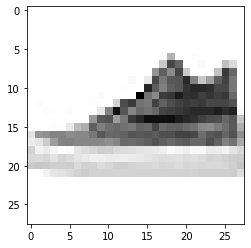

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM
# ADD YOUR CODE
linear_svm  = SVC(kernel='linear')
linear_svm_kfold = GridSearchCV(linear_svm, parameters, cv=4, return_train_score=True)
linear_svm_kfold.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(linear_svm_kfold.best_params_)

print("Score with best parameters:")
print(linear_svm_kfold.best_score_)

print("All scores on the grid:")
print(linear_svm_kfold.cv_results_['mean_test_score'])

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 1}
Score with best parameters:
0.765
All scores on the grid:
[0.54333333 0.73       0.75833333 0.765      0.765      0.765     ]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel
# ADD YOUR CODE

quadratic_svm = SVC (kernel='poly', degree=2)
quadratic_svm_kfold = GridSearchCV(quadratic_svm,  parameters, cv=4, return_train_score=True)
quadratic_svm_kfold.fit(X_train, y_train)
print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(quadratic_svm_kfold.best_params_)
print("Score with best parameters:")
print(quadratic_svm_kfold.best_score_)

print("All scores on the grid:")
print(quadratic_svm_kfold.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.5, 'gamma': 0.05}
Score with best parameters:
0.765
All scores on the grid:
[0.71333333 0.75166667 0.75166667 0.765      0.75166667 0.75166667
 0.75166667 0.75166667 0.75166667]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4
poly_svm = SVC (kernel='poly', degree=degree)
poly_svm_kfold = GridSearchCV(poly_svm,  parameters, cv=4, return_train_score=True)
poly_svm_kfold.fit(X_train, y_train)


print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(poly_svm_kfold.best_params_)

print("Score with best parameters:")
print(poly_svm_kfold.best_score_)


print("All scores on the grid:")
print(poly_svm_kfold.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE= 4  KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.05}
Score with best parameters:
0.6966666666666667
All scores on the grid:
[0.69666667 0.68666667 0.68666667 0.69333333 0.68666667 0.68666667
 0.685      0.68666667 0.68666667]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel
rbf_svm = SVC(kernel='rbf')
rbf_svm_kfold = GridSearchCV(rbf_svm, parameters, cv=4, return_train_score=True)
rbf_svm_kfold.fit(X_train, y_train)
print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(rbf_svm_kfold.best_params_)

print("Score with best parameters:")
print(rbf_svm_kfold.best_score_)

print("All scores on the grid:")
print(rbf_svm_kfold.cv_results_['mean_test_score'])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 50, 'gamma': 0.005}
Score with best parameters:
0.7683333333333333
All scores on the grid:
[0.71       0.67333333 0.125      0.125      0.76       0.73166667
 0.15833333 0.125      0.76833333 0.73166667 0.15833333 0.125
 0.76833333 0.73166667 0.15833333 0.125     ]


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

We get that the rbf kernel SVC returns the higher accuracy, followed by the linear and the quadratic kernels. The 4$^{th}$ degree polynomial turns out to have the worst accuracy.



In [12]:
print('best score with linear kernel:', linear_svm_kfold.best_score_, 'and best parameter', linear_svm_kfold.best_params_)
print('best score with quadratic kernel:', quadratic_svm_kfold.best_score_, 'and best parameters', quadratic_svm_kfold.best_params_)
print('best score with polynomial, degree 4 kernel:', poly_svm_kfold.best_score_, 'and best parameters', poly_svm_kfold.best_params_)
print('best score with rbf kernel:', rbf_svm_kfold.best_score_, 'and best parameters', rbf_svm_kfold.best_params_)

best score with linear kernel: 0.765 and best parameter {'C': 1}
best score with quadratic kernel: 0.765 and best parameters {'C': 0.5, 'gamma': 0.05}
best score with polynomial, degree 4 kernel: 0.6966666666666667 and best parameters {'C': 0.05, 'gamma': 0.05}
best score with rbf kernel: 0.7683333333333333 and best parameters {'C': 50, 'gamma': 0.005}


## TO DO 5
Report here the best SVM kernel and parameters

In [13]:
#get training and test error for the best SVM model from CV
svm = [linear_svm_kfold, quadratic_svm_kfold, poly_svm_kfold, rbf_svm_kfold]
scores = [i.best_score_ for i in svm]       
best_SVM = svm[np.argmax(scores)] 

print(scores)
print(best_SVM)


# (error is 1 - svm.score)
#get the training and test error



training_error = 1 - best_SVM.score(X_train, y_train)

test_error = 1 - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

[0.765, 0.765, 0.6966666666666667, 0.7683333333333333]
GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.5, 5, 50, 500],
                         'gamma': [0.005, 0.05, 0.5, 5]},
             return_train_score=True)
Best SVM training error: 0.000000
Best SVM test error: 0.203500


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [14]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test, train_error, test_error):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(12,4))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],test_error))
    
    plt.show()

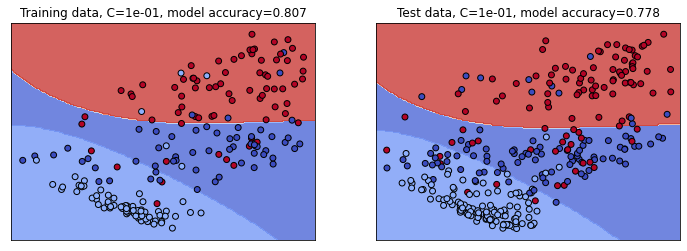

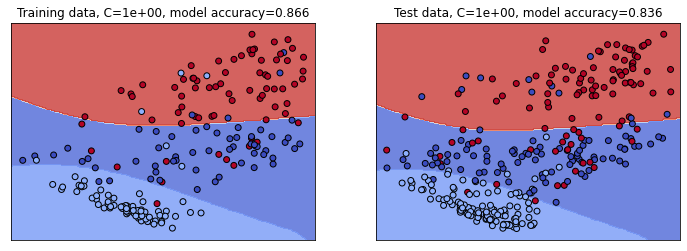

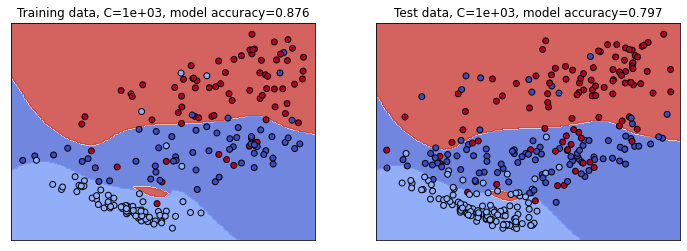

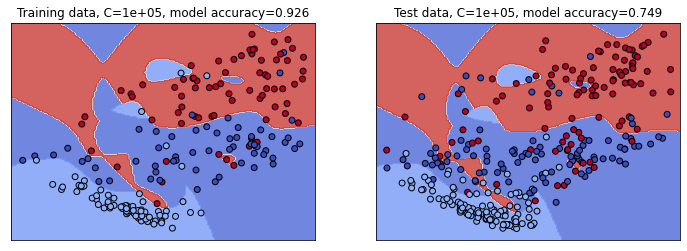

In [15]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [ 1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 


train_accuracy = []
test_accuracy = []


for C in C_list:
        my_svm = SVC(kernel='rbf', C=C).fit(X_train_pca, y_train_plot)
        train_error = my_svm.score(X_train_pca, y_train_plot)
        test_error =  my_svm.score(X_test_pca, y_test_plot)
        train_accuracy.append(train_error)
        test_accuracy.append(test_error)
    # ADD CODE TO TRAIN SVM (use the PCA reduced data)
    
        plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot, train_error, test_error)
    
#fig, ax = plt.subplots(1,2, figsize=(15,5))
#ax[0].plot(C_list, train_accuracy )
#ax[0].set_xscale('log')
#ax[1].plot(C_list, test_accuracy)
#ax[1].set_xscale('log')

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

Increasing the value of C will increase the importance of correct classification against margin maximization, leading to a more complex boundary shape.

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [16]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


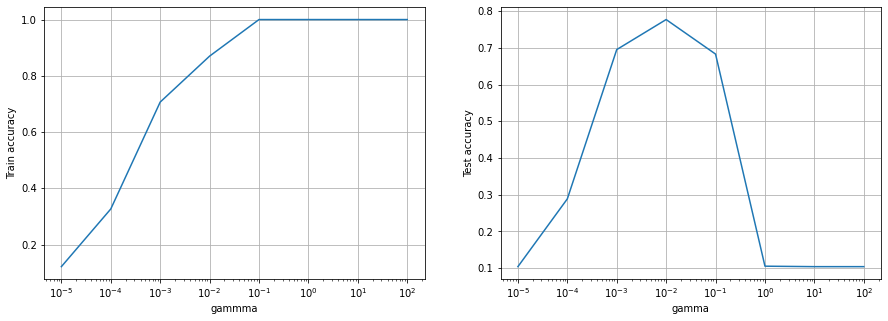

In [17]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

for gamma in gamma_values:
    rbf_svm = SVC(kernel='rbf', C=1, gamma=gamma)
    rbf_svm.fit(X_train, y_train)
    train_acc_list.append(rbf_svm.score(X_train, y_train))
    test_acc_list.append(rbf_svm.score(X_test, y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gammma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

The train accuracy is an increasing function of the gamma parameter, since increasing gamma will lead to smaller and smaller borders around the support vectors until including only the support vectors itself and so classifying correctly all the samples in the training set. This will lead to overfitting. In fact, the test error as a function of gamma presents a maximum: for gamma bigger than 10$^{-2}$ (the best value) the test error will start to increase due to overfitting.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [18]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

m_test = len(X_test)
print(m_test)

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

58500
Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [174 129 145 164 146 145 160 134 151 152]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [19]:
#get training and test error for the best SVM model from CV

# ADD YOUR CODE
best_SVM.fit(X_train, y_train)

training_error = 1 - best_SVM.score(X_train, y_train)

test_error = 1 - best_SVM.score(X_test, y_test)


print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.173145


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [20]:
from sklearn import linear_model

#X_train = np.hstack((np.ones((m_training,1)),X_train))
#X_test = np.hstack((np.ones((m_test,1)),X_test))


log_reg = linear_model.LogisticRegression(C=1e5, max_iter=5000)
log_reg.fit(X_train, y_train)

log_reg.predict(X_test)
training_error = 1 - log_reg.score(X_train, y_train)
test_error = 1  - log_reg.score(X_test, y_test)


print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.214991


## TO DO 10 Try  with regularization (use C=1)¶

In [21]:
log_reg = linear_model.LogisticRegression(C=1, max_iter=5000)
log_reg.fit(X_train, y_train)

log_reg.predict(X_test)
training_error = 1 - log_reg.score(X_train, y_train)
test_error = 1  - log_reg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.012667
Best regularized logistic regression test error: 0.192684


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

For SVM I obtain a training error=0 both with m=600 and with m=1500, whereas the test error decreases from 0.203500 to 0.173145. 

For both  SVM and LR with C=10$^5$ I get the training error=0, whereas I find a larger test error in the LR (0.214991) than in the SVM with m=1500 (0.173145).
In LR with C=1 I obtain a larger training error (0.012667) and a smaller test error (0.192684) than in LR with C=10$^5$ since regularization  decreases overfitting.


## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


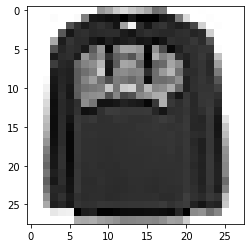

LABEL: 2
6 2 2


In [22]:
LR_prediction = log_reg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

missclassified = 0
i=0

while missclassified == 0 :
    if LR_prediction[i] != y_test[i] and SVM_prediction[i] == y_test[i]:
        missclassified = i
        plot_input(X_test,y_test,i)
        print(LR_prediction[i], SVM_prediction[i], y_test[i])
    i += 1
        
        



## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [23]:
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction) # ADD CODE
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None]  )



confusion_LR = confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )


Labels and frequencies in test set:  [5826 5871 5855 5836 5854 5855 5840 5866 5849 5848]

 Confusion matrix SVM  
 
 [[4699   13   94  197   16    4  729    1   72    1]
 [  36 5584   45  172    7    1   23    0    3    0]
 [ 108    3 3988   73  675    2  943    1   62    0]
 [ 392   52   50 4934  185    0  201    0   22    0]
 [  36   11  760  272 4177    0  568    0   29    1]
 [   5    0    0    2    2 5186    1  433   31  195]
 [ 989   17  630  182  437    1 3443    1  138    2]
 [   0    0    0    0    0  191    0 5353   12  310]
 [  30    4   47   26   23   41   91   30 5549    8]
 [   0    0    0    8    1  118    1  257    5 5458]]

 Confusion matrix SVM (normalized)   
 
 [[0.81 0.   0.02 0.03 0.   0.   0.13 0.   0.01 0.  ]
 [0.01 0.95 0.01 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.68 0.01 0.12 0.   0.16 0.   0.01 0.  ]
 [0.07 0.01 0.01 0.85 0.03 0.   0.03 0.   0.   0.  ]
 [0.01 0.   0.13 0.05 0.71 0.   0.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.89 0.   0.07 0.0

In [24]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

print('normalized confsion martix, SVM \n', confusion_matrix(y_test, SVM_prediction, normalize='true'), '\n')
print('normalized confsion martix, LR \n', confusion_matrix(y_test, LR_prediction, normalize='true'))

normalized confsion martix, SVM 
 [[0.81 0.   0.02 0.03 0.   0.   0.13 0.   0.01 0.  ]
 [0.01 0.95 0.01 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.68 0.01 0.12 0.   0.16 0.   0.01 0.  ]
 [0.07 0.01 0.01 0.85 0.03 0.   0.03 0.   0.   0.  ]
 [0.01 0.   0.13 0.05 0.71 0.   0.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.89 0.   0.07 0.01 0.03]
 [0.17 0.   0.11 0.03 0.07 0.   0.59 0.   0.02 0.  ]
 [0.   0.   0.   0.   0.   0.03 0.   0.91 0.   0.05]
 [0.01 0.   0.01 0.   0.   0.01 0.02 0.01 0.95 0.  ]
 [0.   0.   0.   0.   0.   0.02 0.   0.04 0.   0.93]] 

normalized confsion martix, LR 
 [[0.79 0.01 0.02 0.04 0.   0.   0.11 0.   0.02 0.  ]
 [0.   0.95 0.01 0.03 0.   0.   0.01 0.   0.   0.  ]
 [0.02 0.   0.65 0.01 0.13 0.   0.17 0.   0.02 0.  ]
 [0.06 0.01 0.01 0.83 0.03 0.   0.05 0.   0.   0.  ]
 [0.   0.   0.12 0.04 0.68 0.   0.15 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.87 0.   0.08 0.01 0.04]
 [0.15 0.   0.11 0.04 0.08 0.   0.58 0.   0.04 0.  ]
 [0.   0.   0.   0.   0.   0.

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

I get the lowest accuracies on samples with labels 2,4,6. These corresponds to pullover, coat and shirt. They are really similar item of clothing and can be so easily misclassified as we can infer from the non diagonal elements corresponding to the mixing of these 3 classes.
